# Experimentación de dos variables

## Importando bibliotecas
- <b>Pandas</b>: Nos sirve para leer datos y filtrarlos.
- <b>Seaborn</b>: Es una biblioteca para graficar que nos permite interactuar con datos de Pandas.

- <i>Numpy y Matplotlib son dependencias de Pandas.</i>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Leyendo resultados
Primero, leemos el archivo de resultados de ejecución de bt. Para esto, vamos a abrirlo con Pandas y guardarlo en un DataFrame (df).

In [2]:
df = pd.read_csv("tp2l/complejidades_tree.csv")
df['t'] = df['tiempo']
print(df)

    fila  columna         tiempo              t
0      2        2       0.018787       0.018787
1      2       52       0.320700       0.320700
2      2      102       0.604874       0.604874
3      2      152       0.940081       0.940081
4      2      202       1.139670       1.139670
5      2      302       1.808430       1.808430
6      2      402       2.200790       2.200790
7      2      502       3.045110       3.045110
8     52        2       0.187023       0.187023
9     52       52      13.670900      13.670900
10    52      102      38.178000      38.178000
11    52      152      73.709900      73.709900
12    52      202     126.994000     126.994000
13    52      302     283.249000     283.249000
14    52      402     520.863000     520.863000
15    52      502     769.993000     769.993000
16   102        2       0.353844       0.353844
17   102       52      32.353900      32.353900
18   102      102     103.803000     103.803000
19   102      152     241.654000     241

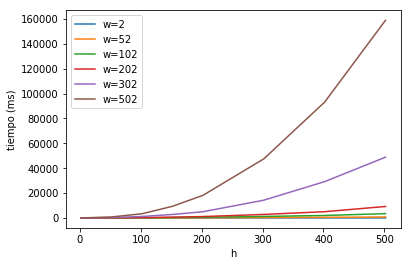

In [3]:
# Graficamos el tiempo en función de n, con series variando m.
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 2]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 52]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 102]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 152]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 302]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 502]);
ax1.legend(["w=2", "w=52", "w=102", "w=202" , "w=302" , "w=502" , ]);
plt.ylabel("tiempo (ms)");
plt.xlabel("h");

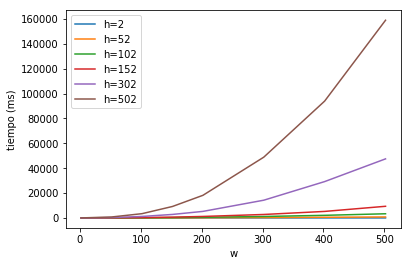

In [4]:
# Graficamos el tiempo en función de m, con series variando n.
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 2]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 52]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 102]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 152]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 302]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 502]);
ax1.legend(["h=2", "h=52", "h=102" , "h=152", "h=302", "h=502"]);
plt.ylabel("tiempo (ms)");
plt.xlabel("w");

Al igual que en $meet$-$in$-$the$-$middle$, y como mencionamos en el gráfico anterior, notamos un comportamiento errático para un mismo $n$ con distintos $W$. Esto refuerza nuestra hipótesis del párrafo anterior, por lo que utilizaremos la experimentación descrita para corroborarla o refutarla.

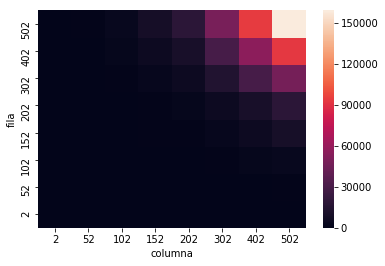

In [10]:
heat_df = df.pivot("fila", "columna", "t");
ax = sns.heatmap(heat_df)
ax.invert_yaxis()

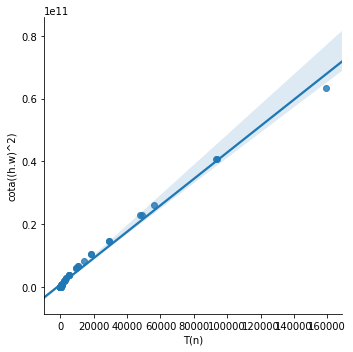

In [11]:
df["cota"] =((df["fila"])**2 * (df["columna"])**2);
# Grafico correlación.
ax1 = sns.lmplot(x='tiempo', y='cota', data=df);
plt.xlabel("T(n)");
plt.ylabel("cota((h.w)^2)");

In [12]:
df2 = df
r = np.corrcoef(df2["t"], df2["cota"])[0, 1];
print("El coeficiente de correlación de Pearson es: r="+str(r))

El coeficiente de correlación de Pearson es: r=0.9957143735435156
